In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sympy import sin, cos, pi

In [2]:
def rotate(ox,oy, px, py):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    ox,oy = origin around which monomers are rotated
    px,py = coordinates of monomers after origin that are rotated
    """
    
    j=1 if np.random.random() < 0.5 else -1   #1 if random number smaller 0.5 otherwise -1
    
    qx = ox + cos(j*pi/2) * (px - ox) - sin(j*pi/2) * (py - oy)
    qy = oy + sin(j*pi/2) * (px - ox) + cos(j*pi/2) * (py - oy)
    return (qx, qy)

In [3]:
def random_rot(polymer):
    #random number is the position around which we rotate
    random_number = np.random.randint(1,int(polymer.shape[0])-2)
    
#     print(random_number)
    new_polymer = polymer.copy()
    
    #half of the time rotate the front of the polymer and other half rotate the end part
    
    if np.random.random() < 0.5:
#         print("rotate end")
        #create new polymer, where we rotate the end part of the old polymer
        qx,qy = rotate(polymer[random_number,0], polymer[random_number,1],polymer[random_number +1:,0],polymer[random_number +1:,1])

        #change positions for rotated polymers
        new_polymer[random_number + 1:, 0] = qx 
        new_polymer[random_number + 1:, 1] = qy
    
    else:
#         print("rotate front")
        #create new polymer, where we rotate the beginnig part of the old polymer
        qx,qy = rotate(polymer[random_number,0], polymer[random_number,1],polymer[:random_number,0],polymer[:random_number,1])

        
        #change positions for rotated polymers
        new_polymer[:random_number, 0] = qx 
        new_polymer[:random_number, 1] = qy
    
    
    for i in range(new_polymer.shape[0]-1):
        if (new_polymer[i,:2].tolist() in new_polymer[:i,:2].tolist()) or (new_polymer[i,:2].tolist() in new_polymer[i+1:,:2].tolist()):
#             print(new_polymer[i,:2])
#             print(new_polymer[i+1:,:2])
#             print(new_polymer[i,:2] in new_polymer[i+1:,:2])
#             print("double detected")
            return polymer
        
#     print("Returned new polymer")
    return new_polymer

    

In [4]:
def assign_colors(x):
    if x == 1000:
        x = "blue"
        
    if x == -1000:
        x = "red"
    return x
    

In [5]:
def plot_polymer(polymer):
    colors = list(map(assign_colors,polymer[:,2]))
    plt.plot(*polymer[:,:2].T, color = "grey")
    plt.scatter(*polymer[:,:2].T, marker='o',s = 500,color = colors)
    plt.xlim(np.min(polymer[:,0])-2, np.max(polymer[:,0])+2)
    plt.ylim(np.min(polymer[:,1])-2, np.max(polymer[:,1])+2)
    
    plt.show()

In [6]:
def compute_energies(state):
    energy = 0
#     print('s', state)
    for index,(x1,y1,label) in enumerate(state):
        if label == 1000:
#             print('x1', index,x1,y1,label)
#             print('s_after', state[index+1:])
            for (x2,y2,label) in state[index+1:]:
                if label == 1000:
#                     print('x2', index,x2,y2,label)
                    #get euclidean distance
                    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
#                     print(dist)
                    if dist == 1.0:
                        energy = energy - 1
#     print('e', energy)
    return energy  

In [7]:
def delta_energy(old_state, new_state):
    #added the two energies since compute energies will give a value of negative numbers if there is a H-H interaction
    energy_old_state = compute_energies(old_state)
    energy_new_state = compute_energies(new_state)
#     print('old_energy', energy_old_state)
#     print('new_energy', energy_new_state)
#     print('delta_energy', energy_old_state + energy_new_state)
    return energy_new_state - energy_old_state 

In [8]:
def metropolis_step(state):
    #initialize new_configuration
    new_configuration = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0], [0,0,0]])
    
    #get new_state: use random rotate function
    new_state = random_rot(state)
    #calculate energy:
    delta_e = delta_energy(state, new_state)
    #condition: if delta_e <= 0, accept the new configuration, if not, accept the new configuration only with probability
    #p = exp(-beta*delta_e)
    if delta_e <= 0:
        new_configuration = new_state
#         print(new_configuration)
    else:
        prob = np.exp(-beta*delta_e)

        unif = np.random.rand()

        if unif < prob:  
            new_configuration = new_state
#             print(new_configuration)
        else:
            new_configuration = state
#             print(new_configuration)
    return new_configuration

In [9]:
state = np.array([[0,1,1000],[0,2,-1000],[0,3,-1000],[0,4,1000],[0,5,-1000], [0,6,1000], [0,7,1000], [0,8,-1000]])

iteration 0


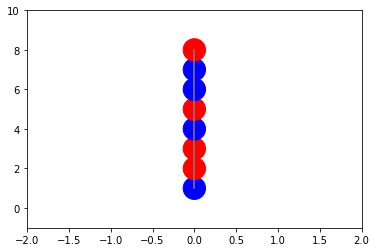

iteration 1


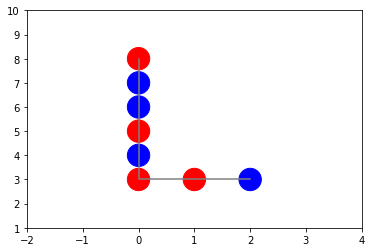

iteration 2


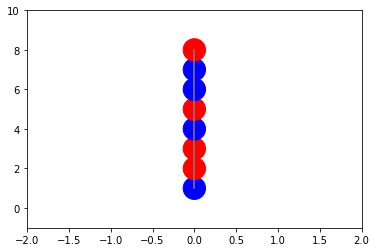

iteration 3


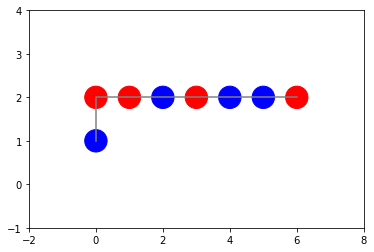

iteration 4


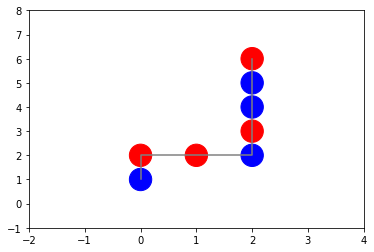

iteration 5


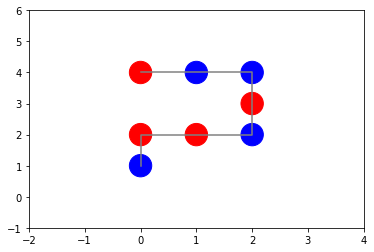

iteration 6


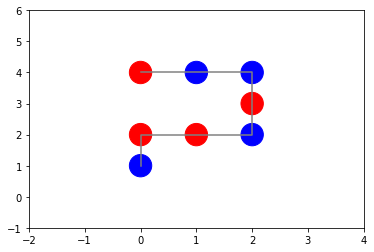

iteration 7


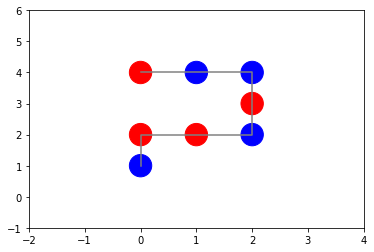

iteration 8


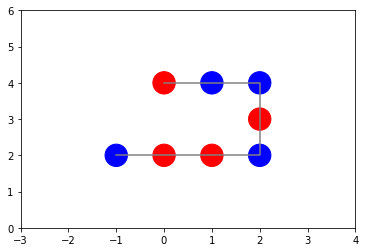

iteration 9


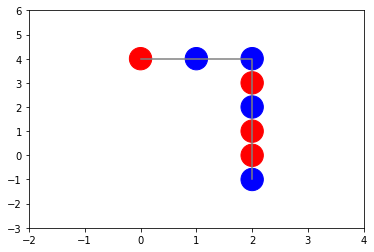

iteration 10


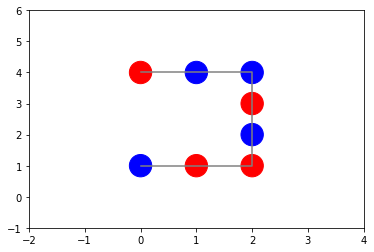

iteration 11


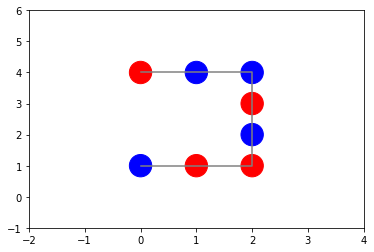

iteration 12


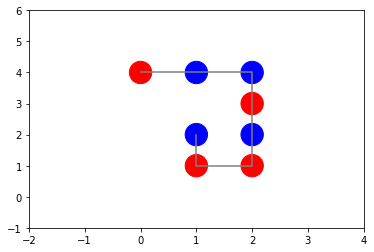

iteration 13


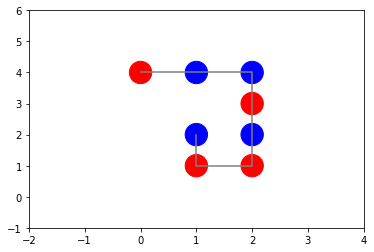

iteration 14


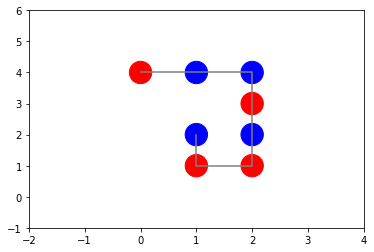

iteration 15


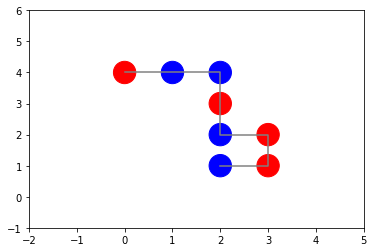

iteration 16


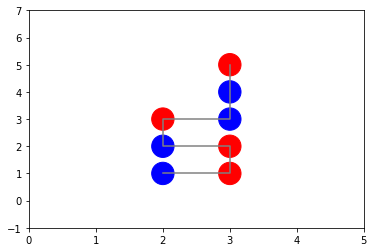

iteration 17


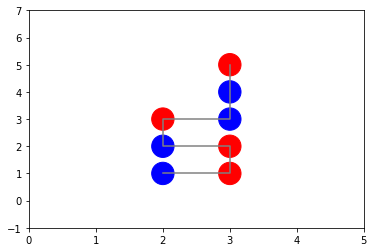

iteration 18


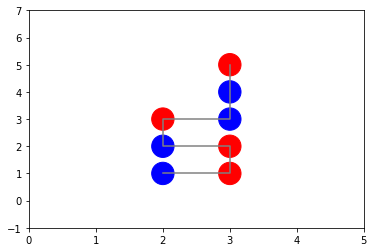

iteration 19


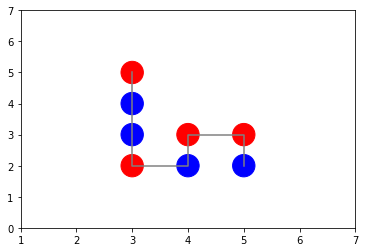

iteration 20


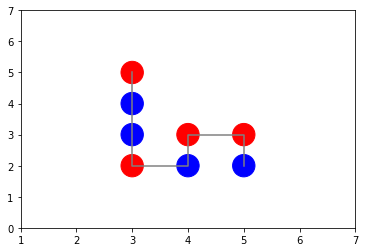

iteration 21


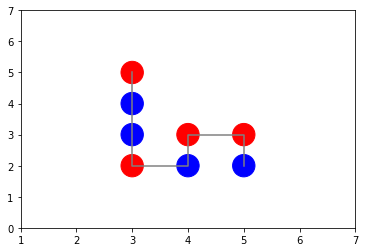

iteration 22


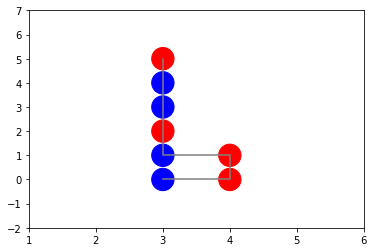

iteration 23


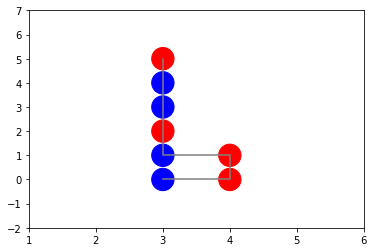

iteration 24


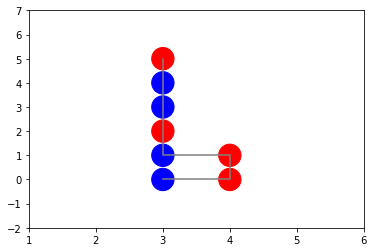

iteration 25


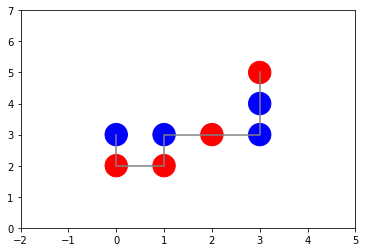

iteration 26


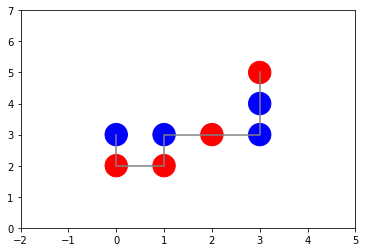

iteration 27


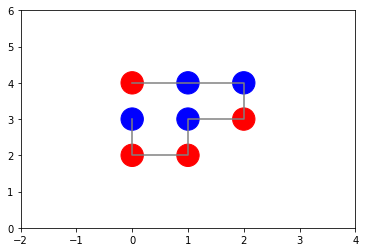

iteration 28


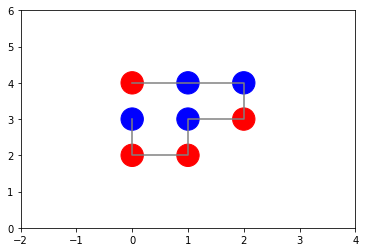

iteration 29


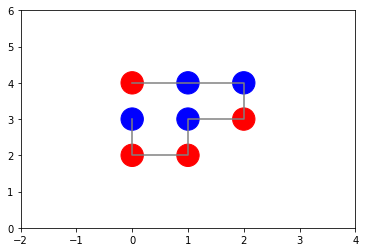

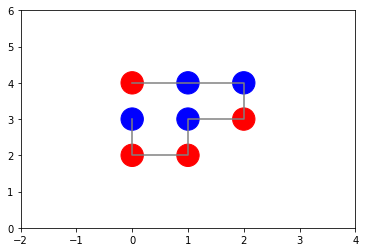

In [10]:
n_realizations = 30
beta = 10
# print('orig state', state)
energy_state_list = []
for i in range(n_realizations):  
    print('iteration', i)
    plot_polymer(state)
    state = metropolis_step(state)
    energy_state = compute_energies(state)
    energy_state_list.append(energy_state)
#     print('energy_state_after', energy_state)
#     print('1 iteration ends')
    if  energy_state == -5:
        print('After', i ,'metropolis steps, the desired new_configuration having minimum energy is obtained')
        final_state = state
        break
plot_polymer(state)
# print('final_state', final_state)

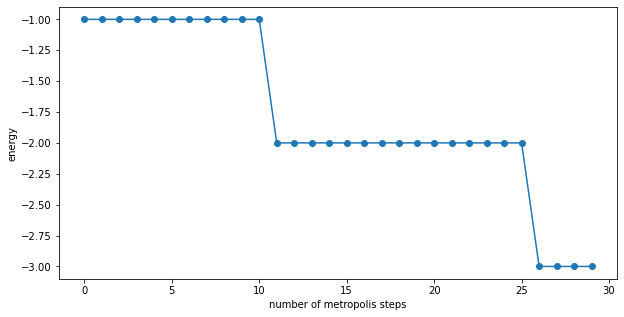

In [12]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,i+1), energy_state_list, marker='o')
plt.xlabel('number of metropolis steps')
plt.ylabel('energy')
plt.show()